In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (14,8)
%matplotlib inline

In [2]:
data = pd.read_excel(r"/content/glass.xlsx", sheet_name = 'glass')

In [3]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
data.duplicated().sum()

np.int64(1)

In [5]:
data.drop_duplicates(keep='first', inplace = True)

In [6]:
data.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [7]:
data.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


<Axes: >

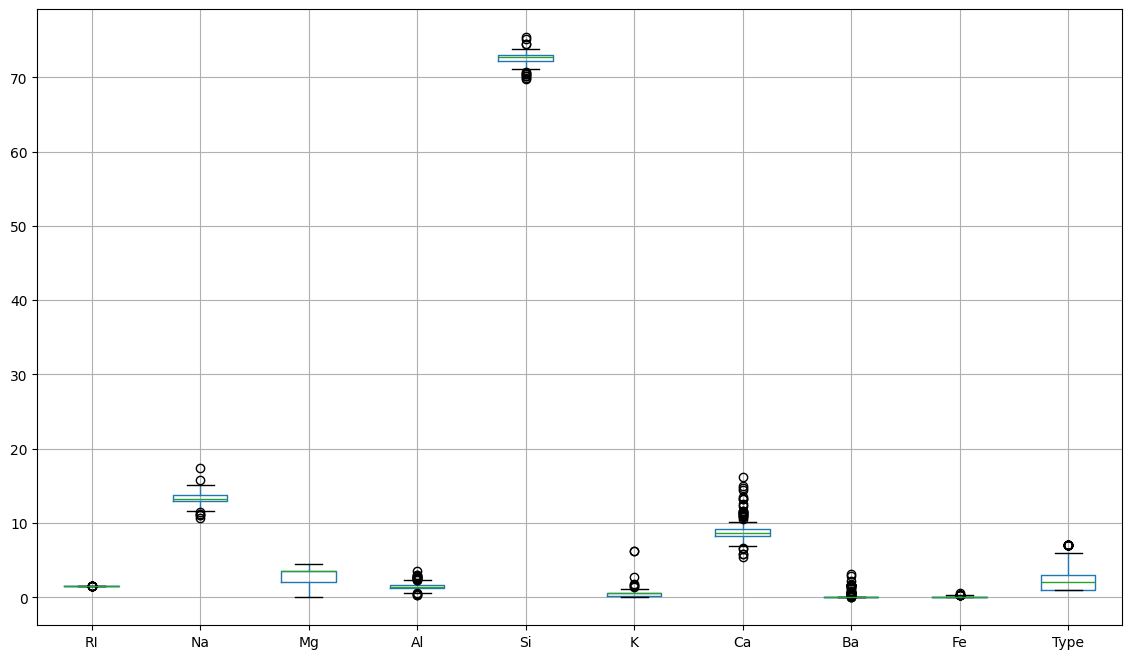

In [8]:
data.boxplot()

In [9]:
data.nunique()

,0
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type,6


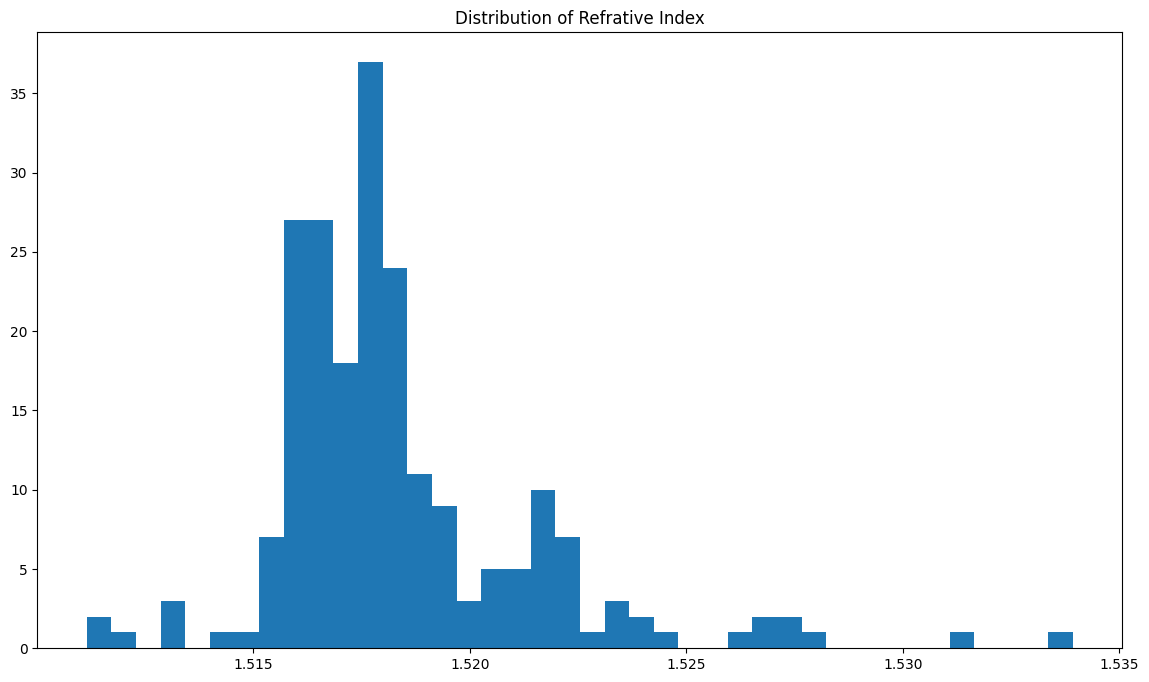

In [10]:
plt.title('Distribution of Refrative Index')
plt.hist(data['RI'], bins = 40);

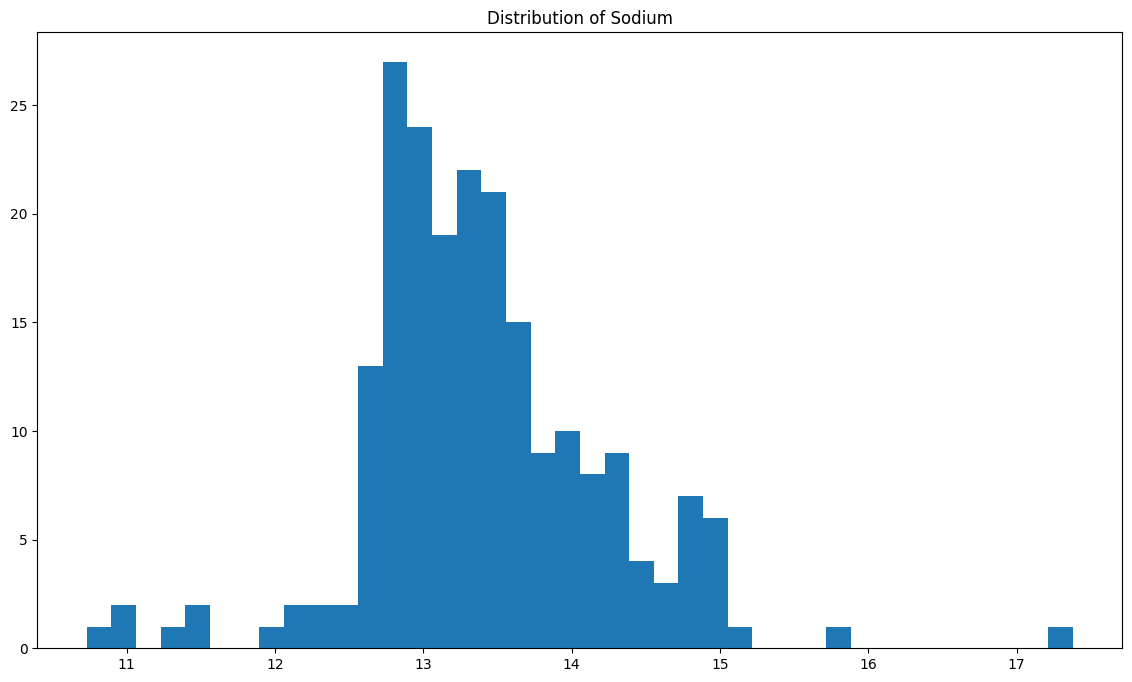

In [11]:
plt.title('Distribution of Sodium')
plt.hist(data['Na'], bins = 40);

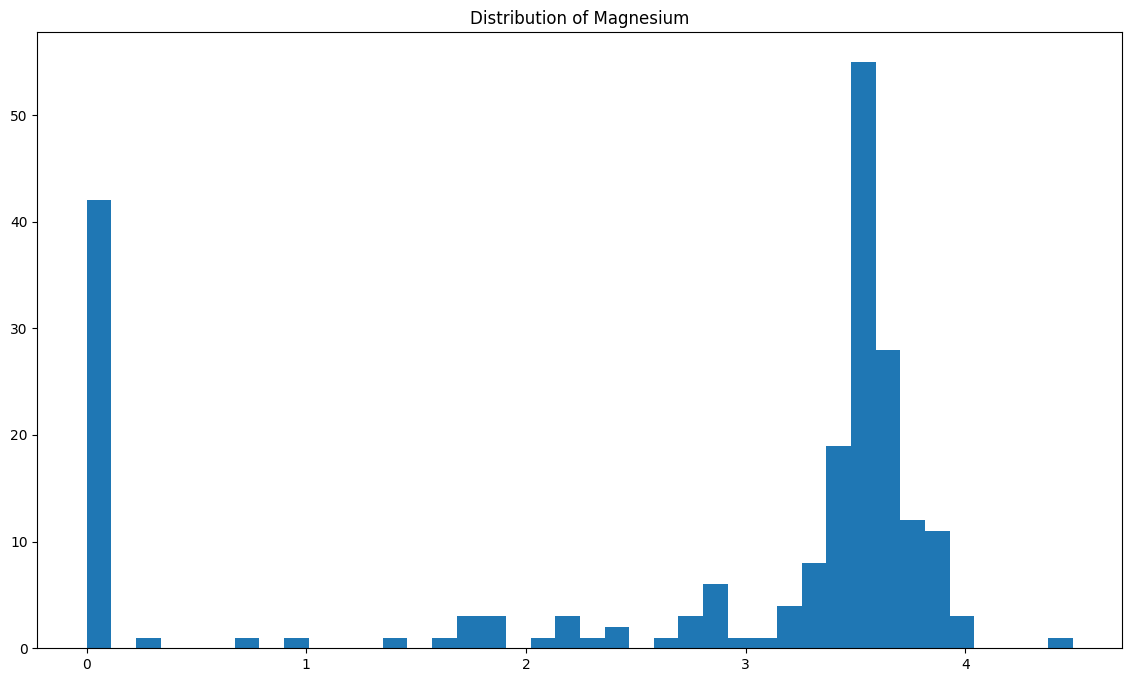

In [12]:
plt.title('Distribution of Magnesium')
plt.hist(data['Mg'], bins = 40);

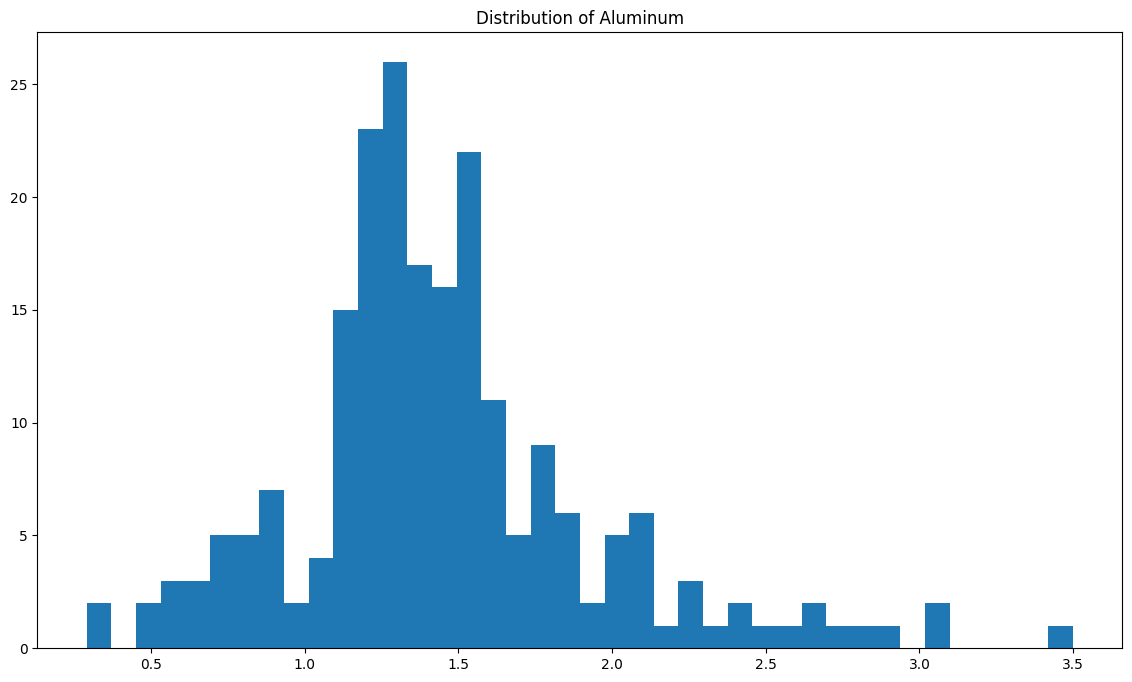

In [13]:
plt.title('Distribution of Aluminum')
plt.hist(data['Al'], bins = 40);

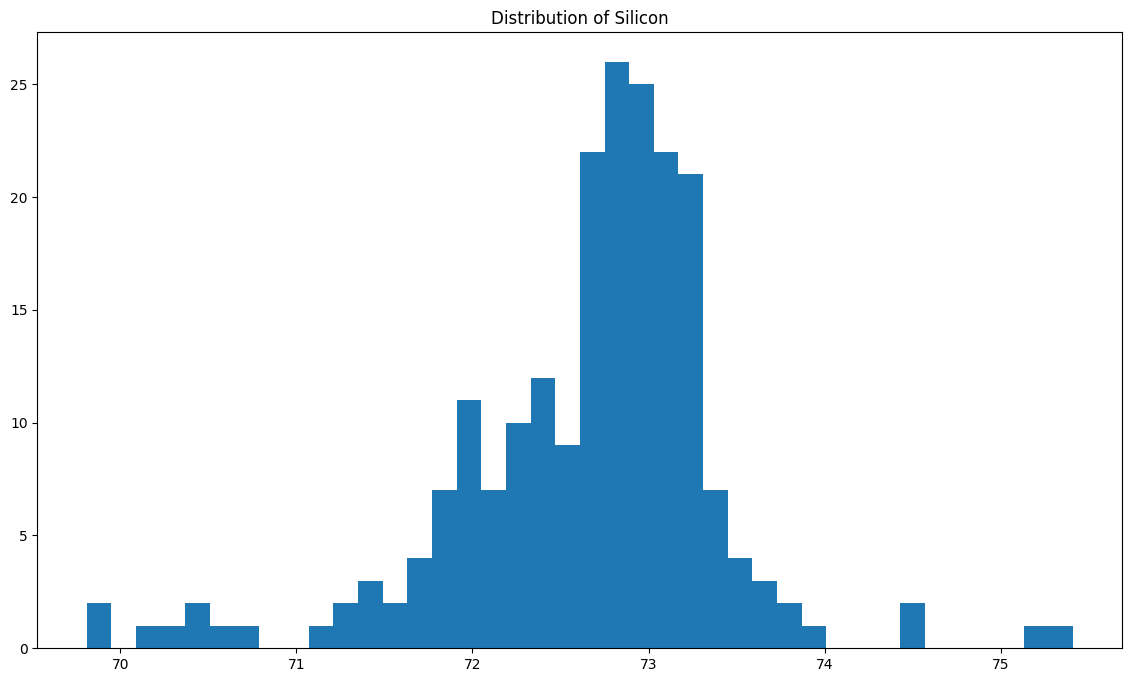

In [14]:
plt.title('Distribution of Silicon')
plt.hist(data['Si'], bins = 40);

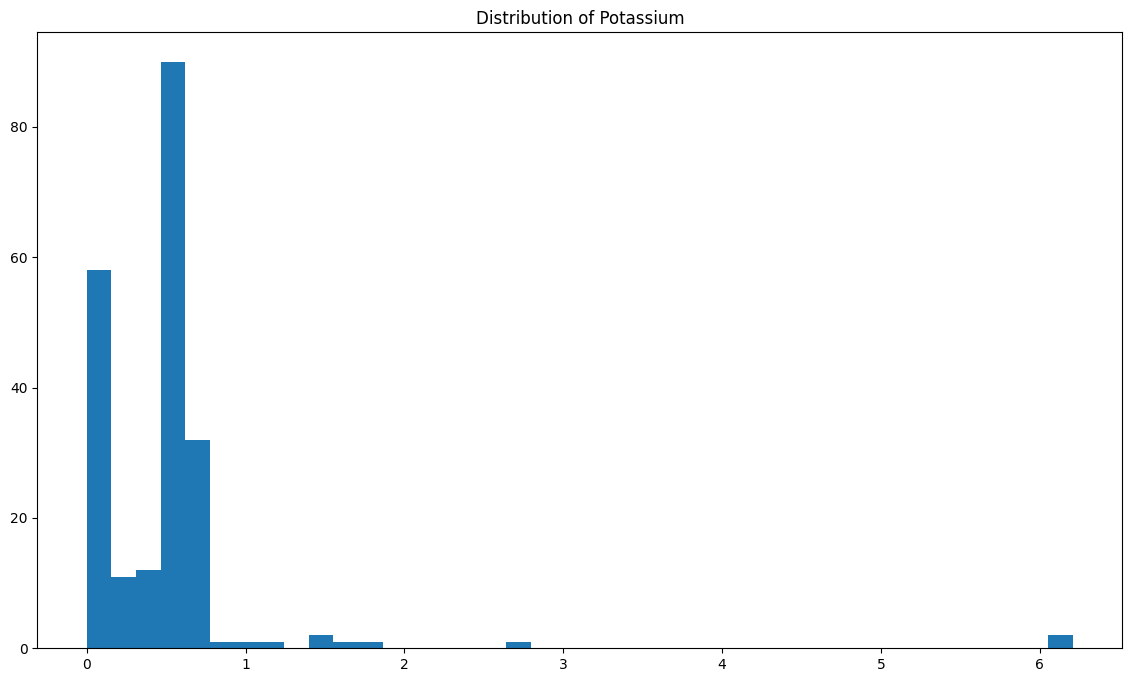

In [15]:
plt.title('Distribution of Potassium')
plt.hist(data['K'], bins = 40);

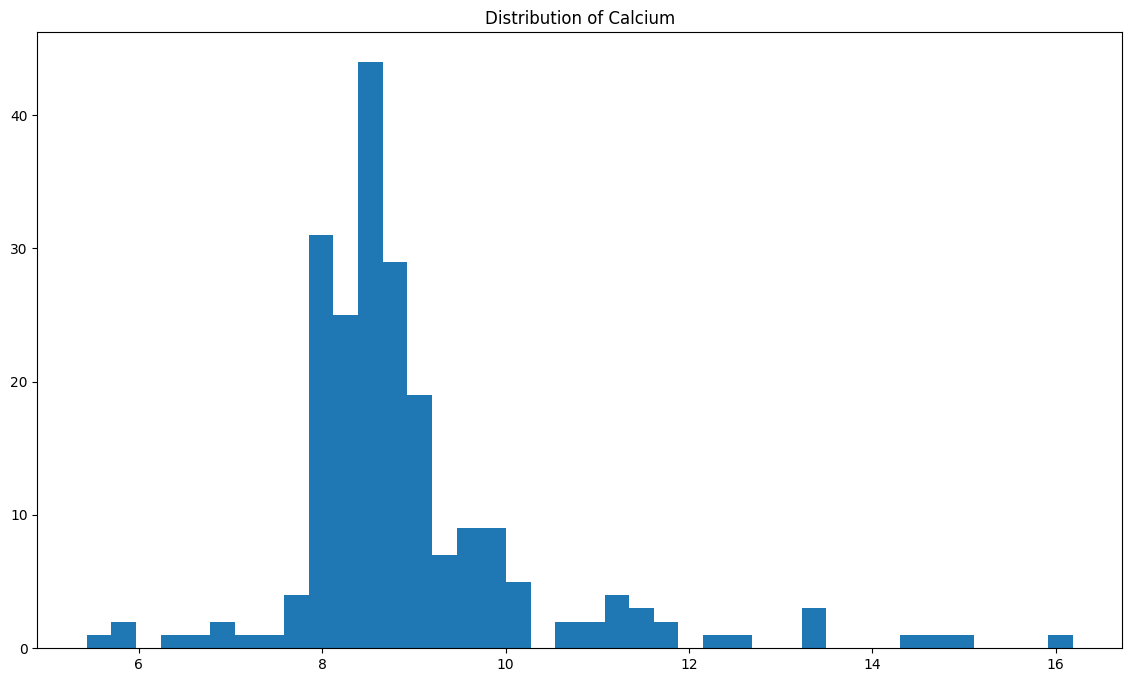

In [16]:
plt.title('Distribution of Calcium')
plt.hist(data['Ca'], bins = 40);

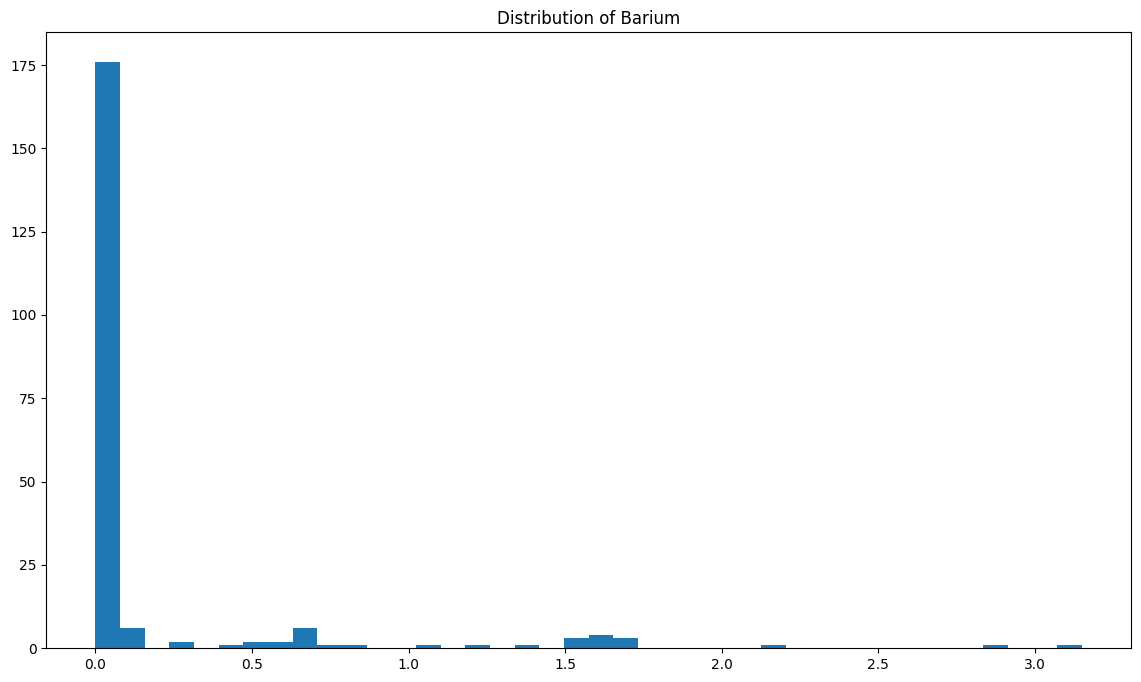

In [17]:
plt.title('Distribution of Barium')
plt.hist(data['Ba'], bins = 40);

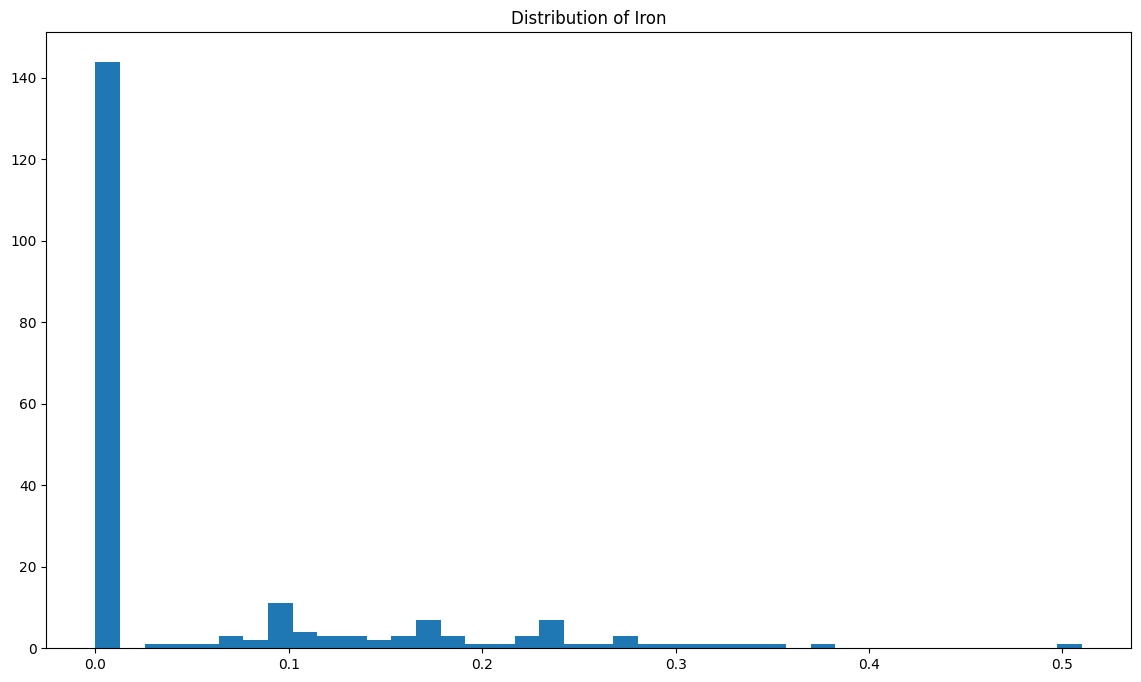

In [18]:
plt.title('Distribution of Iron')
plt.hist(data['Fe'], bins = 40);

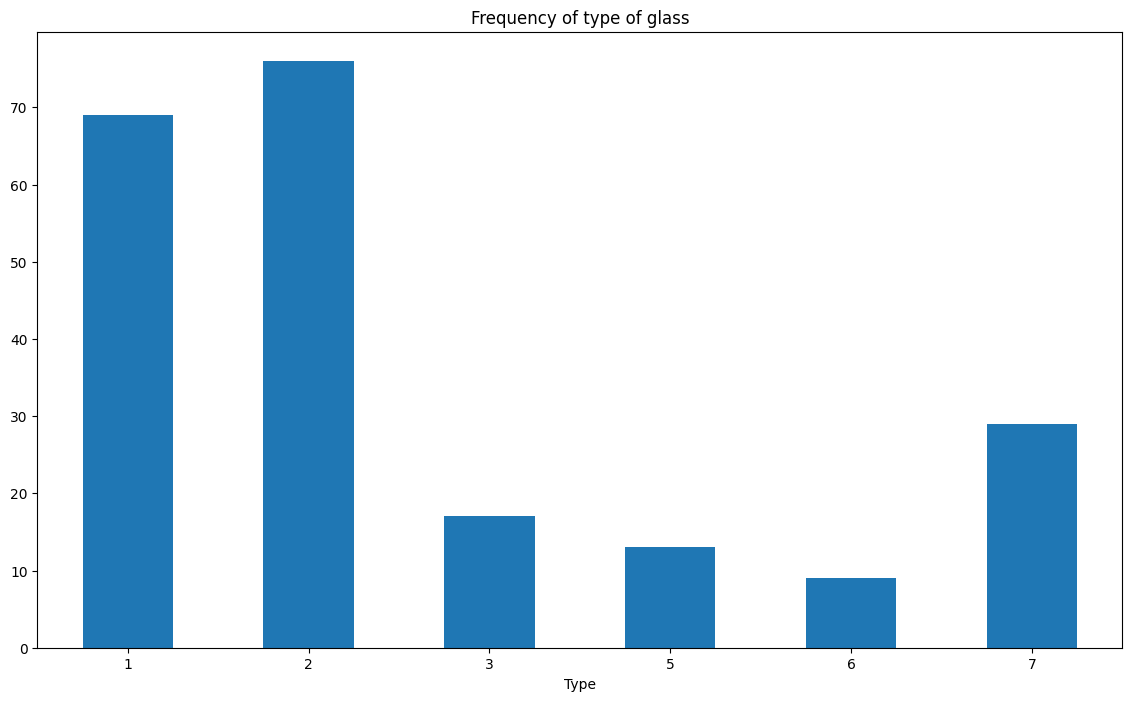

In [19]:
plt.title('Frequency of type of glass')
data['Type'].value_counts().sort_index().plot(kind= 'bar')
plt.xticks(rotation = 0);

<Axes: >

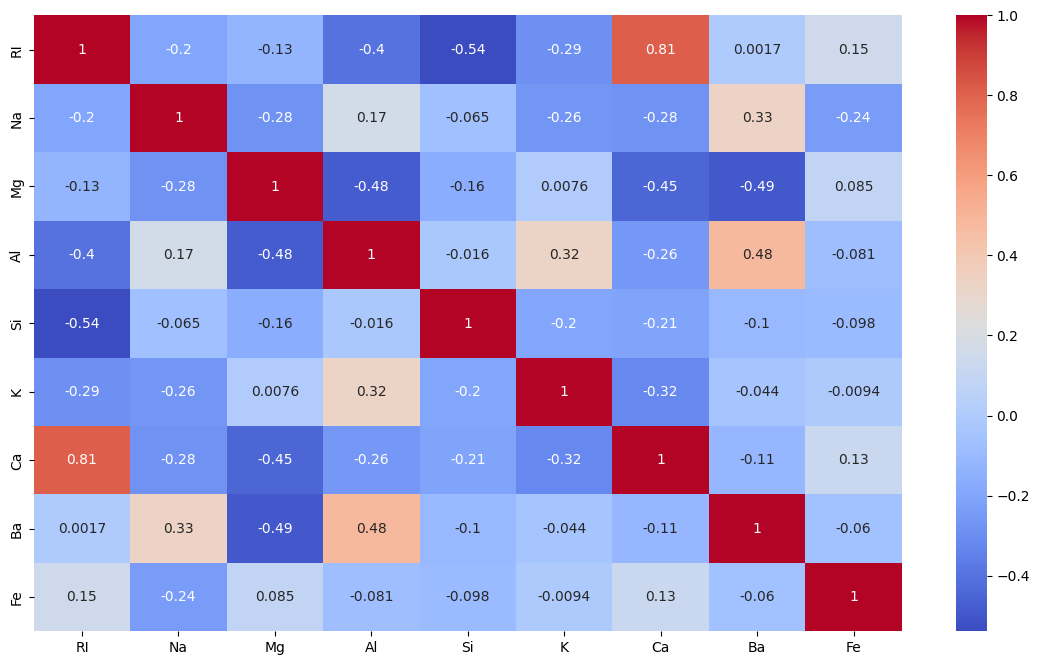

In [20]:
sns.heatmap(data.drop('Type', axis = 1).corr(), annot = True, cmap = 'coolwarm')

In [21]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [22]:
x = data.drop('Type', axis = 1)
y = data[['Type']]

In [23]:
# stratify=y ensures that minority class exist both in training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42, shuffle = True)
# Defining custom sampling strategy
sampling_strategy = {
    6: 20,  # from 7 to 20 (7 are existing classes)
    5: 25,  # from 10 to 25 (10 are existing classes)
    3: 30,  # from 14 to 30 (14 are existing classes)
    7: 40   # from 23 to 40 (23 are existing classes)
}

# Initialize SMOTE with the custom strategy
smote = SMOTE(sampling_strategy = sampling_strategy, random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [24]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.92      0.73      0.81        15
           3       0.60      1.00      0.75         3
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.86        43
   macro avg       0.81      0.93      0.85        43
weighted avg       0.89      0.86      0.86        43



### Bagging

In [26]:
bagg = BaggingClassifier()

In [27]:
bagg.fit(x_resampled, y_resampled)

BaggingClassifier()

In [28]:
y_pred_1 = bagg.predict(x_test)
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           1       0.83      0.71      0.77        14
           2       0.67      0.67      0.67        15
           3       0.75      1.00      0.86         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       0.83      0.83      0.83         6

    accuracy                           0.74        43
   macro avg       0.74      0.81      0.77        43
weighted avg       0.75      0.74      0.74        43



### Boosting

In [29]:
xg = XGBClassifier(n_estimators=100)

In [30]:
y_resampled

,Type
0,7
1,1
2,1
3,1
4,2
...,...
226,7
227,7
228,7
229,7


In [31]:
# For boosting the number should start from 0 not 1 so, mapping is important.
y_resampled_series = y_resampled['Type']
y_resampled_mod = y_resampled_series.map({1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5})

In [32]:
y_test_series = y_test['Type']
y_test_mod = y_test_series.map({1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5})

In [33]:
xg.fit(x_resampled, y_resampled_mod)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [34]:
y_pred_2 = xg.predict(x_test)
print(classification_report(y_test_mod, y_pred_2))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.75      0.80      0.77        15
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         3
           4       0.67      1.00      0.80         2
           5       0.83      0.83      0.83         6

    accuracy                           0.79        43
   macro avg       0.79      0.84      0.81        43
weighted avg       0.80      0.79      0.79        43



### Interview Questions

1.Explain Bagging and Boosting methods. How is it different from each other.
BAGGING:
Idea: Reduce variance by combining predictions from multiple models trained on different subsets of the data.
How it works:
Take random samples with replacement (bootstrap samples) from the original dataset.
Train a separate base model (usually the same type, e.g., decision trees) on each sample.
Combine the predictions:
Regression: Take the average of predictions.
Classification: Use majority voting.

Characteristics:
Models are trained independently in parallel.
Helps reduce overfitting for high-variance models (like decision trees).
Example: Random Forest is a type of bagging with decision trees.

BOOSTING:
Idea: Reduce bias by sequentially training models to correct errors made by previous models.
How it works:
Train a base model on the original data.
Identify where the model made mistakes (misclassified points or high residuals).
Give more weight to those difficult examples in the next model.
Train the next model on this weighted dataset.
Repeat steps 2–4 for several iterations.
Combine predictions of all models (usually weighted).

Characteristics:
Models are trained sequentially.
Focuses on hard-to-predict examples.
Can reduce bias and variance depending on the implementation.
Examples: AdaBoost, Gradient Boosting, XGBoost, LightGBM.


2.Explain how to handle imbalance in the data?

Handling imbalanced data involves techniques to ensure the model doesn’t become biased toward the majority class. At the data level, this can be done by oversampling the minority class (e.g., duplicating samples or using SMOTE) or undersampling the majority class. At the algorithm level, one can use class weighting or cost-sensitive learning to penalize misclassifications of the minority class. It’s also important to evaluate performance using metrics like precision, recall, F1-score, or ROC-AUC instead of accuracy, as accuracy can be misleading. Combining these strategies often improves model performance on the minority class while maintaining overall reliability.